<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/assignments/M1_AST_09_Matrix_Decompositions_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 09:  Matrix Decompositions

## Learning Objectives

At the end of the experiment, you will be able to

* know what is matrix decomposition
* perform different types of matrix decompositions
* see the pythonic implementation of use-cases in SVD and PCA

### Introduction

A **matrix decomposition** or **matrix factorization** is a factorization of a matrix into a product of matrices. It is an approach that simplifies more complex matrix operations by using a decomposed matrix rather than on the original matrix itself.

There are many ways to decompose a matrix, hence there is a range of different matrix decomposition techniques.

Decompositions related to solving systems of linear equations
* QR Factorization
* Cholesky Decomposition

Decompositions based on eigenvalues and related concepts
* Eigenvalue Decomposition
* Singular Value Decomposition

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2301978" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9844001418" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_09_Matrix_Decompositions_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Images/houses.jpg")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image              # to import images in notebook
import sympy as sy
from pprint import pprint
%matplotlib inline

### QR Factorization

The QR decomposition (or QR factorization) of a matrix is a decomposition of the matrix into an orthogonal matrix and a triangular matrix. A QR decomposition of a real square matrix $A$ is a decomposition of $A$ as
$$A = QR$$
where $Q$ is an orthogonal matrix (i.e. $Q^TQ = I$) and $R$ is an upper triangular matrix.
<center>
<img src="http://www.sharetechnote.com/image/EngMath_Matrix_QRDecomposition_02.png" width= 400 px/>
</center>

There are several methods for actually computing the QR decomposition. One such method is the Gram-Schmidt process.

#### Computing the QR factorization with Gram–Schmidt process

The Gram-Schmidt process works by finding an orthogonal projection $q_n$ for each column vector $a_n$ and then subtracting its projections onto the previous projections $(q_j)$. The resulting vector is then divided by the length of that vector to produce a unit vector.

For example, let's find the QR-factorization of matrix A given as
$$A = \begin{bmatrix} 1 & 1 & 0 \\ -1 & 0 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix}.$$

Denote the columns of $A$ as $c_1$, $c_2$, and $c_3$.

If we apply the Gram-Schmidt algorithm to these columns, the result is:
$$f_1 = c1 = \begin{bmatrix} 1 \\ -1 \\ 0 \\ 0 \end{bmatrix},\ \ f_2 = c_2 - \frac{1}{2}f_1 = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \\ 1 \\ 0 \end{bmatrix},\ \ and\ \ f_3 = c_3 + \frac{1}{2}f_1 - f_2 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}.$$

Write $q_j = \frac{1}{||f_j||^2}f_j$ for each j, so {$q_1, q_2, q_3$} is orthonormal.

Then A can be written as A = QR where

$$Q = \begin{bmatrix} q_1 & q_2 & q_3 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} & 0 \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} & 0 \\ 0 & \frac{2}{\sqrt{6}} & 0 \\ 0 & 0 & 1 \end{bmatrix} = \frac{1}{\sqrt{6}} \begin{bmatrix} \sqrt{3} & 1 & 0 \\ -\sqrt{3} & 1 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & \sqrt{6} \end{bmatrix}$$

$$R = \begin{bmatrix} ||f_1|| & c_2.q_1 & c_3.q_1 \\ 0 & ||f_2|| & c_3.q_2 \\ 0 & 0& ||f_3|| \end{bmatrix} = \begin{bmatrix} \sqrt{2} & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ 0 & \frac{\sqrt{3}}{\sqrt{2}} & \frac{\sqrt{3}}{\sqrt{2}} \\ 0 & 0 & 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 2 & 1 & -1 \\ 0 & \sqrt{3} & \sqrt{3} \\ 0 & 0 & \sqrt{2} \end{bmatrix}$$

We can verify that $A = QR.$

Let us now implement QR factorization using a Python library

**Exercise 1:** Find a QR factorization of

$$\mathbf{A} = \begin{bmatrix} 2 & -2 & 18 \\ 2 & 1 & 0 \\ 1 & 2 & 0 \end{bmatrix}.$$

In [ ]:
A = sy.Matrix([[2, -2, 18], [2, 1, 0], [1, 2, 0]])
A

Matrix([
[2, -2, 18],
[2,  1,  0],
[1,  2,  0]])

In [ ]:
Q, R = A.QRdecomposition()
print("A:")
pprint(A)

print("Q:")
pprint(Q)

print("R:")
pprint(R)

A:
Matrix([
[2, -2, 18],
[2,  1,  0],
[1,  2,  0]])
Q:
Matrix([
[2/3, -2/3,  1/3],
[2/3,  1/3, -2/3],
[1/3,  2/3,  2/3]])
R:
Matrix([
[3, 0,  12],
[0, 3, -12],
[0, 0,   6]])


In [ ]:
# QR = A
Q*R == A

True

### Cholesky Decomposition

In linear algebra, the Cholesky decomposition or Cholesky factorization is a decomposition of a symmetric, positive-definite matrix into the product of a lower triangular matrix and its transpose, which is useful for efficient numerical solutions.

The Cholesky decomposition of a symmetric positive-definite matrix A, is a decomposition of the form
$$A = LL^T$$

where $L$ is a real lower triangular matrix with positive diagonal entries and $L^T$ denotes the transpose of $L$.

Consider a 3x3 symmetric matrix $A$ and its Cholesky decomposition

$$A = LL^T$$

$$\begin{bmatrix} a_{11} & a_{21} & a_{31} \\ a_{21} & a_{22} & a_{32} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} =  \begin{bmatrix} l_{11} & 0 & 0 \\ l_{21} & l_{22} & 0 \\ l_{31} & l_{32} & l_{33} \end{bmatrix} \begin{bmatrix} l_{11} & l_{21} & l_{31} \\ 0 & l_{22} & l_{32} \\ 0 & 0 & l_{33} \end{bmatrix}$$


In order to solve for the lower triangular matrix, we use the Cholesky-Banachiewicz Algorithm. First, we calculate the values for $L$ on the main diagonal and then the off-diagonals for the elements below the diagonal:
$$l_{kk} = \sqrt{a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}$$
$$l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right), i > k $$

To know more about Cholesky decomposition click [here](https://towardsdatascience.com/behind-the-models-cholesky-decomposition-b61ef17a65fb).

**Exercise 2:** Find the Cholesky decomposition of a symmetric matrix

$$\mathbf{A} = \begin{bmatrix} 25 & 15 & -5 \\ 15 & 18 & 0 \\ -5 & 0 & 11 \end{bmatrix}.$$

In [ ]:
A = sy.Matrix([[25, 15, -5], [15, 18, 0], [-5, 0, 11]])
A

Matrix([
[25, 15, -5],
[15, 18,  0],
[-5,  0, 11]])

In [ ]:
# Lower triangular matrix
L = A.cholesky()
L

Matrix([
[ 5, 0, 0],
[ 3, 3, 0],
[-1, 1, 3]])

In [ ]:
# L.L_transpose = A
L*L.transpose() == A

True

Before going through Eigenvalue decomposition we first need to understand two terms related to eigenvalues:

**Algebraic multiplicity** of an eigenvalue λ of matrix A is the number of times λ appears as a root of characteristic polynomial (i.e., the polynomial whose roots are the eigenvalues of matrix A).

**Geometric multiplicity** of an eigenvalue is the number of linearly independent eigenvectors associated with it.

### Eigenvalue Decomposition

In linear algebra, eigendecomposition (or spectral decomposition) is the factorization of a matrix into a matrix that is represented in terms of its eigenvalues and eigenvectors. Only diagonalizable matrices can be factorized in this way. Refer to [this](https://towardsdatascience.com/the-jewel-of-the-matrix-a-deep-dive-into-eigenvalues-eigenvectors-22f1c8da11fd) article to delve deeper.

It is applicable to a square matrix $A$ with linearly independent eigenvectors (not necessarily distinct eigenvalues).

Most matrices are complete, i.e. their (complex) eigenvectors form a basis of the underlying vector space.

- A particularly important class is the symmetric matrices, whose eigenvectors form an orthogonal basis of $R^n$. A non-square matrix A does not have eigenvalues. In their place, one uses the square roots of the eigenvalues of the associated square Gram matrix $K = A^TA$, which are called singular values of the original matrix.

**Existence:** An n-by-n matrix $A$ always has $n$ (complex) eigenvalues, which can be ordered (in more than one way) to form an n-by-n diagonal matrix $D$ and a corresponding matrix of nonzero columns $V$ that satisfies the eigenvalue equation $$AV=VD$$

Decomposition is therefore given as: $$ A=VDV^{-1}$$ where $D$ is a diagonal matrix formed from the eigenvalues of $A$,

and the columns of $V$ are the corresponding eigenvectors of $A$.
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/EigenDecomposition.png" width= 500 px/>
</center>

Now let us look at a numerical example of eigenvalue decomposition

**Exercise 3:** Find the eigenvalue decomposition of

$$\mathbf{A} = \begin{bmatrix} 5 & 2 & 0 \\ 2 & 5 & 0 \\ -3 & 4 & 6 \end{bmatrix}.$$

In [ ]:
A = sy.Matrix([[5, 2, 0], [2, 5, 0], [-3, 4, 6]])
A

Matrix([
[ 5, 2, 0],
[ 2, 5, 0],
[-3, 4, 6]])

In [ ]:
# Eigen values and eigen vectors of A
E = A.eigenvects()   # returns eigenvalues, their algebraic multiplicity, eigenvectors
E                    # The algebraic multiplicity of an eigenvalue λ of A is the number of times λ appears as a root of polynomial of A.

[(3,
  1,
  [Matrix([
   [ 3/7],
   [-3/7],
   [   1]])]),
 (6,
  1,
  [Matrix([
   [0],
   [0],
   [1]])]),
 (7,
  1,
  [Matrix([
   [1],
   [1],
   [1]])])]

In [ ]:
# Matrix consist of eigen vectors as columns
V = sy.Matrix()
for i in range(len(E)):
    V = V.col_insert(i, sy.Matrix(E[i][2]))
V

Matrix([
[ 3/7, 0, 1],
[-3/7, 0, 1],
[   1, 1, 1]])

In [ ]:
# Diagonal matrix consist of eigen values
D = sy.Matrix([[E[0][0], 0, 0], [0, E[1][0], 0], [0, 0, E[2][0]]])
D

Matrix([
[3, 0, 0],
[0, 6, 0],
[0, 0, 7]])

In [ ]:
# V.D.V_inverse = A
V*D*V**-1 == A

True

### Singular Value Decomposition

Let $A$ be an m x n matrix with rank $r$. Then there exists an m x n matrix $Σ$ for which the diagonal entries in $D$ are the first $r$ singular values of $A$, $\sigma_1≥\sigma_2≥\cdots≥\sigma_r>0$, and there exists an m x m orthogonal matrix $U$ and an n x n orthogonal matrix $V$ such that

$$\begin{equation}
A = U\Sigma V^{T}
\end{equation}.$$


Any factorization $\begin{equation}A = U\Sigma V^{T}\end{equation}$, with $U$ and $V$ orthogonal, $Σ$ as
$\mathbf{Σ} = \begin{bmatrix} D & 0 \\ 0 & 0 \end{bmatrix}$
and positive diagonal entries in $D$, is called a **singular value decomposition** (or SVD) of A. The matrices $U$ and $V$ are not uniquely determined by $A$, but the diagonal entries of $Σ$ are necessarily the singular values of $A$. The columns of $U$ in such a decomposition are called left singular vectors of $A$, and the columns of $V$ are called
right singular vectors of $A$.

**Exercise 4:** Find the singular value decomposition of A where,

$$\mathbf{A} = \begin{bmatrix} 4 & 11 & 14 \\ 8 & 7 & -2 \end{bmatrix}$$

In [ ]:
A = sy.Matrix([[4, 11, 14], [8, 7, -2]])
A

Matrix([
[4, 11, 14],
[8,  7, -2]])

**Step 1: Find $A^TA$**

First, we compute the singular values $σ_i$ by finding the eigenvalues of $A^TA$.

In [ ]:
ATA = A.transpose() * A
ATA

Matrix([
[ 80, 100,  40],
[100, 170, 140],
[ 40, 140, 200]])

In [ ]:
E = ATA.eigenvects()
E

[(0,
  1,
  [Matrix([
   [ 2],
   [-2],
   [ 1]])]),
 (90,
  1,
  [Matrix([
   [  -1],
   [-1/2],
   [   1]])]),
 (360,
  1,
  [Matrix([
   [1/2],
   [  1],
   [  1]])])]

**Step 2: Set up $V$ and $\Sigma$**

From the above results, the eigenvalues of $A^TA$ are 360, 90, and 0. Arrange the eigenvalues in decreasing order. Corresponding unit eigenvectors are shown below.

In [ ]:
e1, e2, e3 = E[2][0], E[1][0], E[0][0]                                          # eigen values
print("Eigen values:", e1, e2, e3)

v1 = sy.Matrix(E[2][2])                                                         # eigen vectors
v2 = sy.Matrix(E[1][2])
v3 = sy.Matrix(E[0][2])

v1 = v1/v1.norm()                                                               # unit eigen vectors
v2 = v2/v2.norm()
v3 = v3/v3.norm()
print("Unit eigen vectors:")
v1, v2, v3

Eigen values: 360 90 0
Unit eigen vectors:


(Matrix([
 [1/3],
 [2/3],
 [2/3]]),
 Matrix([
 [-2/3],
 [-1/3],
 [ 2/3]]),
 Matrix([
 [ 2/3],
 [-2/3],
 [ 1/3]]))

 The corresponding unit eigenvectors, v1, v2, and v3, are the right singular vectors of $A$. Using these we can construct orthogonal matrix $V$.

In [ ]:
eig_vec = {0: v1, 1: v2, 2: v3}
V = sy.Matrix()
for k,v in eig_vec.items():
    V = V.col_insert(k, v)
V

Matrix([
[1/3, -2/3,  2/3],
[2/3, -1/3, -2/3],
[2/3,  2/3,  1/3]])

The square roots of the eigenvalues of $A^TA$ are the singular values of $A$:

 $σ_1$ = √360 = 6√10,

 $σ_2$ = √90 = 3√10 and

 $σ_3$ = 0.

 The nonzero singular values are the diagonal entries of $D$. The matrix $\Sigma$ is the same size as $A$, with $D$ in its upper left corner and with $0$’s elsewhere.

$$\mathbf{D} = \begin{bmatrix} 6√10 & 0 \\ 0 & 3√10 \end{bmatrix},\ \ \ \mathbf{\Sigma} = \begin{bmatrix} D & 0 \end{bmatrix} = \begin{bmatrix} 6√10 & 0 & 0 \\ 0 & 3√10 & 0 \end{bmatrix}$$

In [ ]:
s1, s2 = e1**0.5, e2**0.5                                     # singular values
sigma = sy.Matrix([[s1, 0, 0], [0, s2, 0]])
sigma

Matrix([
[18.9736659610103,                0, 0],
[               0, 9.48683298050514, 0]])

**Step 3: Construct $U$**

When $A$ has rank $r$, the first $r$ columns of $U$ are the normalized
vectors obtained from $Av_1,\cdots, Av_r$ . Here, $A$ has two nonzero singular values, so rank $A$ = 2.

 Also, from $||Av_i||^2 = \lambda_i $ where $\lambda$ denotes eigen value

we have
  $||Av_1|| = √\lambda_1 = \sigma_1$ and $||Av_2|| = √\lambda_2 = \sigma_2$.

Thus

$u_1 = \frac{1}{||Av_1||}Av_1 = \frac{1}{\sigma_1}Av_1$

$u_2 = \frac{1}{||Av_2||}Av_2 = \frac{1}{\sigma_2}Av_2$

Note that {$u_1, u_2$} is already a basis for $\mathbb{R}^2$. Thus no additional vectors are needed for $U$, and
$U = \begin{bmatrix} u_1 \ u_2 \end{bmatrix}$.

In [ ]:
u1 = A * v1 / s1
u2 = A * v2 / s2
U = sy.Matrix()
U = U.col_insert(0, u1)
U = U.col_insert(1, u2)
U

Matrix([
[0.948683298050514,  0.316227766016838],
[0.316227766016838, -0.948683298050514]])

In [ ]:
# U.Σ.V^T = A
U * sigma * V.transpose() == A

True

**Note:** Take the case when $\sigma_2 = 0$, then  $Av_2 = 0$ as $||Av_i|| = \sigma_i$ and only column we found for $U$ is {$u_1$} then other columns of $U$ are found by extending the set {$u_1$} to an orthonormal basis for $\mathbb{R}^3$. Say we need two orthogonal unit vectors $u_2$ and $u_3$ that are orthogonal to $u_1$ then each vector must satisfy $u^T_1 x = 0.$

#### Image compression using SVD

**Low-rank approximations of $A$**

Let $k$ a natural number, where $k\leq\text{rank}(A)\leq\min\{n, m\}$.

Using SVD-decomposition of $A$, if $A = UDV^T$, then we keep the first $k$ values in $D$ as it is and set the subsequent singular values to zero. Let us denote the resulting diagonal matrix by $D_k$. It is easy to see that we only have to keep the first $k$ columns of $U$ and the first $k$ rows of $V$ since their other columns would be multiplied by zeros anyway as shown in the figure below. To sum up, the matrix $A_k = U_kD_kV_k^T$ is the closest matrix to $A$ having rank $k$, where $U_k$ and $V_k$ consist of the first $k$ columns and rows of $U$ and $V$, respectively.

If $A$ is a large matrix, that is $n,m$ are large and $k$ is relatively small, then the information we need to store to approximate the information content stored in $A$ is much smaller. That is, we can reduce the storage space significantly and we are still able to store almost the same information that the original matrix has.
<center>
<img src= "https://cdn.iisc.talentsprint.com/CDS/Images/svd.png" width= 400 px/>
</center>

Here we will see how low-rank approximation of a matrix provides a solution to compress an image.

Images are represented in a rectangular array where each element corresponds to the grayscale value for that pixel. For colored images we have a $3$-dimensional array of size $n\times m\times 3$, where $n$ and $m$ represents the number of pixels vertically and horizontally, respectively, and for each pixel we store the intensity for colors red, green and blue.

We will repeat the low-rank approximation procedure above on a larger matrix, that is, we create the low-rank approximation of a matrix that represents an image for each color separately. The resulting $3$-dimensional array will be a good approximation of the original image.

In [ ]:
# Read image store it as array
image_ = np.array(Image.open('houses.jpg'))

In [ ]:
# Normalize the intensity values in each pixel
image = image_ / 255
row, col, _ = image.shape
print("pixels: ", row, "*", col)

pixels:  640 * 1024


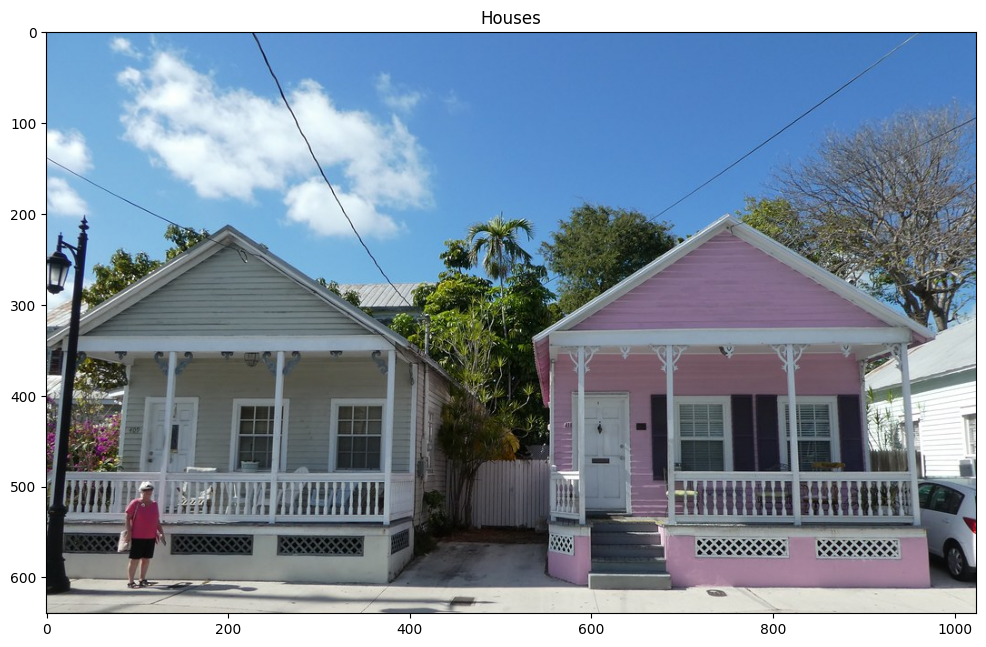

In [ ]:
# Display image
fig = plt.figure(figsize=(12, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image)
a.set_title('Houses')
plt.show()

In [ ]:
# Break the image into three different arrays based on colors
image_red = image[:, :, 0]
image_green = image[:, :, 1]
image_blue = image[:, :, 2]

In [ ]:
# Check for the space needed for original image
original_bytes = image.nbytes
print("The space (in bytes) needed to store this image is", original_bytes)

The space (in bytes) needed to store this image is 15728640


Now perform the SVD-decomposition on the $3$ matrices corresponding to the different colors separately.

In [ ]:
# SVD decomposition of three matrices
U_r, D_r, VT_r = np.linalg.svd(image_red, full_matrices=True)
U_g, D_g, VT_g = np.linalg.svd(image_green, full_matrices=True)
U_b, D_b, VT_b = np.linalg.svd(image_blue, full_matrices=True)

In [ ]:
# Check for the bytes to be stored
bytes_to_be_stored = sum([matrix.nbytes for matrix in [U_r, D_r, VT_r, U_g, D_g, VT_g, U_b, D_b, VT_b]])
print("The matrices that we store have total size (in bytes):", bytes_to_be_stored)

The matrices that we store have total size (in bytes): 35011584


Now we decide that the information that the image contains and represented in $1024$ columns can be represented with $k=50$ columns as well, but these $k$ columns will be taken from the decomposition matrices.

In [ ]:
# Specify value of k
k = 50

In [ ]:
# Selecting k columns from U matrix and k rows from VT matrix
U_r_k  = U_r[:, 0:k]
VT_r_k = VT_r[0:k, :]
U_g_k  = U_g[:, 0:k]
VT_g_k = VT_g[0:k, :]
U_b_k  = U_b[:, 0:k]
VT_b_k = VT_b[0:k, :]

D_r_k = D_r[0:k]
D_g_k = D_g[0:k]
D_b_k = D_b[0:k]

In [ ]:
compressed_bytes = sum([matrix.nbytes for matrix in [U_r_k, D_r_k, VT_r_k, U_g_k, D_g_k, VT_g_k, U_b_k, D_b_k, VT_b_k]])
print("The compressed matrices that we store now have total size (in bytes):", compressed_bytes)

The compressed matrices that we store now have total size (in bytes): 1998000


In [ ]:
ratio = compressed_bytes / original_bytes
print("The compression ratio between the original image size and the total size of the compressed factors is", ratio)

The compression ratio between the original image size and the total size of the compressed factors is 0.1270294189453125


Let's construct the approximate matrices for each color and merge them together. We also need to correct those pixels where the intensity value is outside of the range $[0,1]$.

In [ ]:
# Reconstruct matrices for each color
image_red_approx = np.dot(U_r_k, np.dot(np.diag(D_r_k), VT_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(D_g_k), VT_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(D_b_k), VT_b_k))

In [ ]:
# Reconstruct the original image from color matrices
image_reconstructed = np.zeros((row, col, 3))

image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx

In [ ]:
# Correct the pixels where intensity value is outside the range [0,1]
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

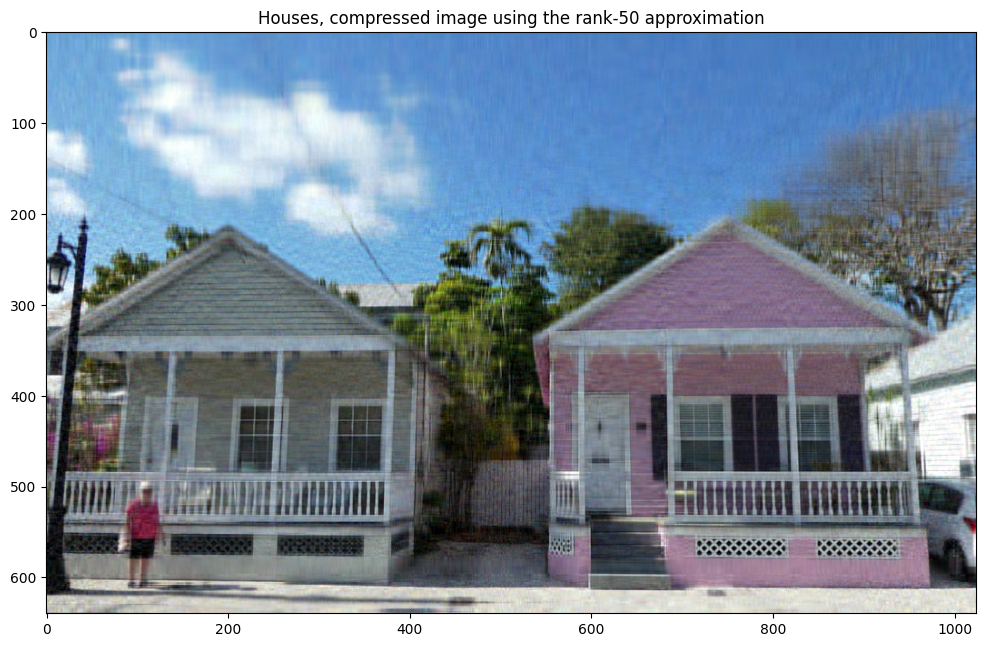

In [ ]:
# Display the reconstructed image

fig = plt.figure(figsize=(12, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Houses, compressed image using the rank-{} approximation'.format(k))
plt.show()

Different values of $k$ results in different compression quality, the higher the $k$ is, the closer the compressed image to the original, but increasing $k$ means larger matrices.

### PageRank

PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results.

* It is a way of measuring the importance of website pages.
* It works by counting the number and quality of links to a page to determine a rough estimate of how important the website is.
* More important websites are likely to receive more links from other websites.
* Outputs a **probability distribution** used to represent the likelihood that a person randomly clicking on links will arrive at any particular page.
* Distribution is evenly divided among all pages in the collection at the beginning of the computational process.
* PageRank computations require several passes, called "iterations", through the collection to adjust approximate PageRank values to more closely reflect the theoretical true value.

For further information, refer [here](http://mason.gmu.edu/~acurran3/EigenValues/Eigenvalues.html).

<img src= "https://cdn.iisc.talentsprint.com/CDS/Images/pagerank.JPG" width= 200 px/>

The diagram above represents a model mini Internet, where
* each bubble is a webpage, and
* each arrow represents a link on that webpage that takes you to one of the others

We will build an expression that tells us which of these web pages is most relevant to the person who made the search.

We can describe the links present on page $A$ as a vector, where each row is either a one or a zero based on whether there is a link to the corresponding page. And then normalize the vector by the total number of the links, such that they can be used to describe a probability for that page. For example, the vector of links from page A will be 0 1 1 1. So we can write, $L_A = (0, 1/3, 1/3, 1/3)$. Similarly, the link vectors in the next three sites are $L_B = (1/2, 0, 0, 1/2)$, $L_C = (0, 0, 0, 1)$ and $L_D = (0, 1/2, 1/2, 0)$.

We can now build our link matrix $L$ by using each of the linked vectors as a column. With matrix $L$ we are trying to represent the probability of ending up on each of the pages.

$$L = \begin{bmatrix} 0 & \frac{1}{2} & 0 & 0 \\ \frac{1}{3} & 0 & 0& \frac{1}{2} \\ \frac{1}{3} & 0 & 0 & \frac{1}{2} \\ \frac{1}{3} & \frac{1}{2} & 1& 0 \end{bmatrix}$$

We use the vector $r$ to store the rank of all web pages. We can write the expression applied to all web pages as simple matrix multiplication. So $$r = Lr$$

We assume that all the ranks are equal and normalized by the total number of web pages in the analysis. So $r = (\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4})$. Then, each time we multiply $r$ by the matrix $L$, this gives us an updated value for $r$. So we can say that $$r_{i+1} = L  r_i$$

Applying this expression repeatedly means that we are solving this problem iteratively. Each time we do this, we update the values in $r$ until, eventually, $r$ stops changing. So now $r$ does equal $Lr$. This implies that $r$ is now an eigenvector of matrix $L$, with an eigenvalue of $1$.

In [ ]:
import sympy as sy
# Build L matrix
L = sy.Matrix([[0, 1/2, 0, 0],
               [1/3, 0, 0, 1/2],
               [1/3, 0, 0, 1/2],
               [1/3, 1/2, 1, 0]])
print("L:")
pprint(L)
# Build initial r vector
r = sy.Matrix([[1/4], [1/4], [1/4], [1/4]])
previous_r = r
for i in range(1,100):
     r = L * r
     if previous_r==r:
                break
     previous_r = r
print('\n r: ',r)

L:
Matrix([
[                0, 0.5, 0,   0],
[0.333333333333333,   0, 0, 0.5],
[0.333333333333333,   0, 0, 0.5],
[0.333333333333333, 0.5, 1,   0]])

 r:  Matrix([[0.120001509727180], [0.239997257585739], [0.239997257585739], [0.400003975101341]])


So now we have our result, which says that as we randomly click around our network, we would expect to spend about 40% of the time on page D. But only about 12% of the time on page A, with 24% on each of pages B and C.

The same can be calculated by finding the eigen vector of matrix $L$ with an eigenvalue of 1.

For an eigen vector $x$ the following equation should hold
$$|L - \lambda I|x = 0$$

where $\lambda$ is the corresponding eigen value and $I$ is an identity matrix.

In [ ]:
I = sy.eye(4)
eig_val = 1
A = L - eig_val * I
A

Matrix([
[               -1, 0.5,  0,   0],
[0.333333333333333,  -1,  0, 0.5],
[0.333333333333333,   0, -1, 0.5],
[0.333333333333333, 0.5,  1,  -1]])

In [ ]:
# Create an augmented matrix
Aug = A.col_insert(4, sy.Matrix([[0], [0], [0], [0]]))
Aug.rref()                  # show the rref form

(Matrix([
 [1, 0, 0, -0.3, 0],
 [0, 1, 0, -0.6, 0],
 [0, 0, 1, -0.6, 0],
 [0, 0, 0,    0, 0]]),
 (0, 1, 2))

From above we get three equations with four variables.
$$x_1 - 0.3x_4 = 0$$
$$x_2 - 0.6x_4 = 0$$
$$x_3 - 0.6x_4 = 0$$
 As the results should be a probability distribution we can add one more condition to it
$$x_1 + x_2 + x_3 + x_4 = 1$$

Now new augmented matrix will be,

In [ ]:
Aug_new = sy.Matrix([[1, 0, 0, -0.3, 0],
                    [0, 1, 0, -0.6, 0],
                    [0, 0, 1, -0.6, 0],
                    [1, 1, 1, 1, 1]])
Aug_new.rref()                          # show rref form

(Matrix([
 [1, 0, 0, 0, 0.12],
 [0, 1, 0, 0, 0.24],
 [0, 0, 1, 0, 0.24],
 [0, 0, 0, 1,  0.4]]),
 (0, 1, 2, 3))

The results are the same as in the case of iterative method.

### Principal Component Analysis

The problem we face when analyzing higher-dimensional datasets is referred to as “The curse of dimensionality”. Principal component analysis or PCA is known as a dimensionality reduction technique.

Steps to implement PCA:

* Subtract the mean of each variable so that the dataset will be centered on the origin.
* Calculate the Covariance Matrix
* Compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. The Eigenvectors of the Covariance matrix are Orthogonal to each other and each vector represents a principal axis. A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

* Sort Eigenvalues in descending order: each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

* Select a subset from the rearranged Eigenvalue matrix as per need
* Transform the data: transform the data by having a dot product between the transpose of the Eigenvector subset and the transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In below example we will see how PCA works.

In [ ]:
# Write a function for PCA
def PCA(X , num_components):

    # Subtract the mean
    X_meaned = X - np.mean(X , axis = 0)

    # Calculate the covariance matrix
    cov_mat = np.cov(X_meaned , rowvar = False)

    # Compute the eigen values and eigen vectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    # Sort the eigen values in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # Select a subset
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

**Dataset**

The dataset we use here for performing principal component analysis is Iris dataset. It contains four features (length and width of sepals and petals measured in cm) of 50 samples of three species of Iris plant (Iris setosa, Iris virginica and Iris versicolor).

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width= 500 px/>

In [ ]:
# Import Iris Dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
data = pd.DataFrame(X, columns=iris.feature_names)
data = pd.concat([data , pd.DataFrame(y, columns= ['target'])] , axis = 1)
for i in range(len(data)):
    if data.loc[i, 'target'] == 0:
        data.loc[i, 'target'] = iris.target_names[0]
    if data.loc[i, 'target'] == 1:
        data.loc[i, 'target'] = iris.target_names[1]
    if data.loc[i, 'target'] == 2:
        data.loc[i, 'target'] = iris.target_names[2]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


        PC1       PC2  target
0  2.684126  0.319397  setosa
1  2.714142 -0.177001  setosa
2  2.888991 -0.144949  setosa
3  2.745343 -0.318299  setosa
4  2.728717  0.326755  setosa


<Axes: xlabel='PC1', ylabel='PC2'>

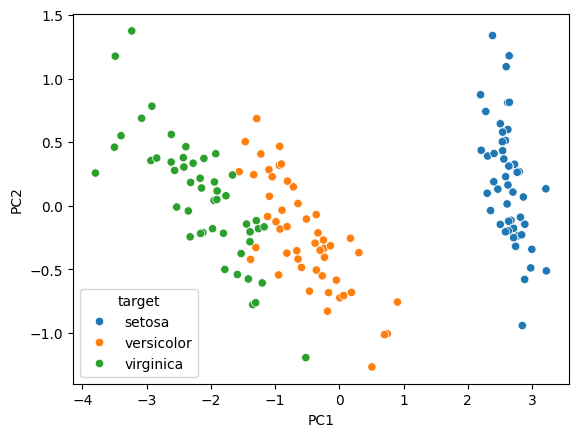

In [ ]:
# Prepare the data
x = data.iloc[:,0:4]

# Prepare the target
target = data.iloc[:,4]

# Applying it to PCA function
mat_reduced = PCA(x, 2)

# Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

# Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target, columns= ['target'])] , axis = 1)
print(principal_df.head())
sns.scatterplot(data = principal_df, x= 'PC1', y= 'PC2', hue= 'target')

From the above plot, it can be seen even after reducing the data to only two variables its variability is still intact.

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Select the FALSE statement: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Singular value decomposition is defined only for symmetric matrices" #@param ["", "Eigendecomposition can only be applied to diagonalizable matrices", "Singular value decomposition is defined only for symmetric matrices", "Cholesky factorization is a decomposition of a symmetric, positive-definite matrix into the product of a lower triangular matrix and its transpose"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "No comments" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1640
Date of submission:  24 Jan 2024
Time of submission:  12:38:47
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
